In [1]:
import numpy as np
import sympy as smp
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

In [2]:
x,y,z,u1,u2,u3,v1,v2,v3,t =smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

# Vector and Geometry

In [3]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

In [5]:
print(type(a))
a # when look at no more numpy array

<class 'numpy.ndarray'>


array([1, 2, 3])

In [6]:
u

Matrix([
[u_1],
[u_2],
[u_3]])

In [7]:
u.subs([(u1,3)]) # we can substitute the values in place of variable

Matrix([
[  3],
[u_2],
[u_3]])

# Addition and Multiplication

In [8]:
2*a+b

array([ 9, 12, 15])

In [9]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

# Dot Product

In [10]:
np.dot(a,b)

50

In [11]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

# Cross Product

In [12]:
np.cross(a,b)

array([-6, 12, -6])

In [13]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

# Length of vector

In [14]:
np.linalg.norm(a)

3.7416573867739413

In [15]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

# Vector Projection
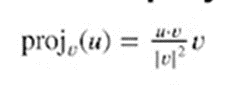

In [14]:
proj_b_a =np.dot(a,b)/np.linalg.norm(b)**2*b
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

array([1.80412371, 2.0715567, 2.31958763])

In [16]:
proj_v_u = u.dot(v)/v.norm()**2*v

In [20]:
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

# Lines/Planes in Space

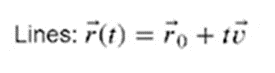

In [17]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

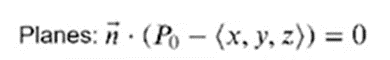

In [18]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0 - r)

-x - y - z + 16

Examples
Find the vector parallel to the line of intersection of the two plane
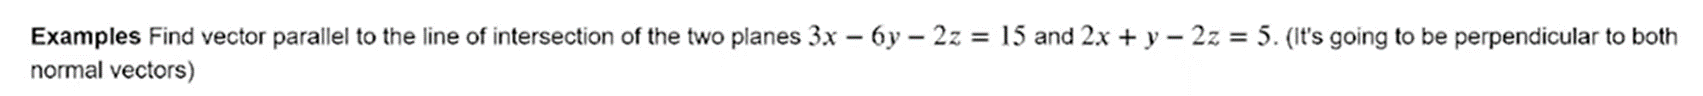

In [19]:
n1 = np.array([-3,6,2])
n2 = np.array([-2,-1,2])
ans = np.cross(n1,n2)
ans

array([14,  2, 15])

# Vector Calculus

Vector Derivatives

In [20]:
r = smp.Matrix([3*t,smp.sin(t),t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [21]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

Example: Find the angle between the velocity and acceleration as a function of 0(t)

In [22]:
v =smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()

velocity and accelattion is he fuction of time

In [23]:
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [24]:
theta.subs(t,6).evalf()

0.251108015692338

In [25]:
f = smp.lambdify([t],theta)

In [26]:
f(3)

0.46699569950836095

In [30]:
tk = np.linspace(0,20,15)
tk

array([ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
        7.14285714,  8.57142857, 10.        , 11.42857143, 12.85714286,
       14.28571429, 15.71428571, 17.14285714, 18.57142857, 20.        ])

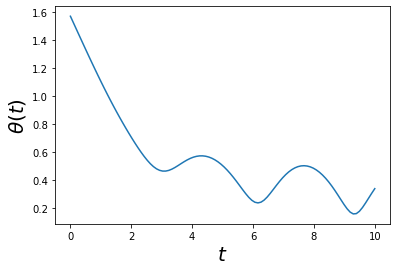

In [31]:
tt = np.linspace(0,10,100)
aa = smp.lambdify([t],theta)(tt)
plt.plot(tt,aa)
plt.xlabel('$t$',fontsize = 20)
plt.ylabel(r'$\theta(t)$',fontsize = 20)
plt.show()

# Vector Integrals

In [32]:
r = smp.Matrix([smp.exp(t)*smp.cos(t),t**4,1/(1+t**2)])

In [34]:
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [35]:
smp.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [36]:
smp.Integral(r)

Integral(Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]]), t)

In some cages integral cannot be evaluated symbolically: must solve definite integrals numericlly

In [40]:
smp.Integral(r).doit
#not able to do symbolically

<bound method Integral.doit of Integral(Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]]), t)>

integrate from t =0 to t=4

In [41]:
r_num = smp.lambdify([t],r)

In [42]:
r_num = smp.lambdify([t],r)
quad_vec(r_num,0,4)[0]

array([[-39.00387433],
       [204.8       ],
       [  1.32581766]])

# Arclength

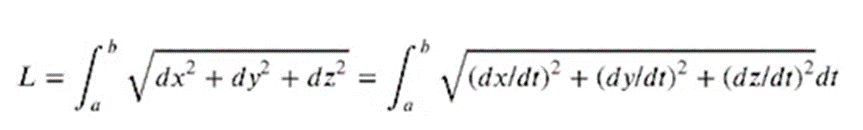

Rare Cases can be done symbolically, Find arclength of <0,t,t^2> from t= 0 

In [45]:
r = smp.Matrix([0,t,t**2])
smp.integrate(smp.diff(r,t).norm(),(t,0,1))

asinh(2)/4 + sqrt(5)/2

In [44]:
r = smp.Matrix([smp.exp(t),smp.sin(t),t**4])
r_num =smp.lambdify([t],smp.diff(r,t).norm())
quad(r_num,0,1)[0]

2.316977146444862

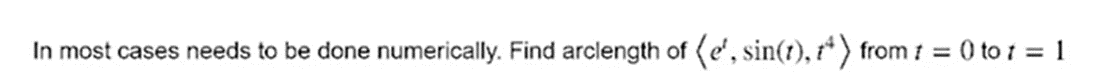

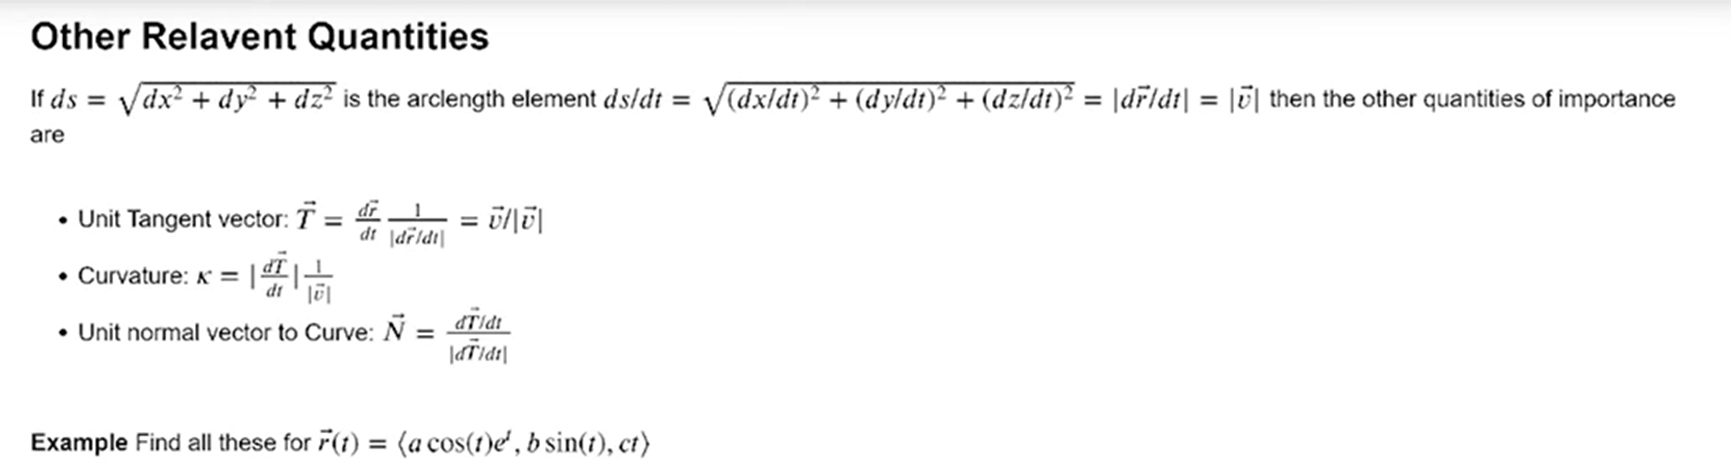

In [46]:
t,a,b,c = smp.symbols('t a b c', pos=True, real=True)

Define the path

In [47]:
r = smp.Matrix([a*smp.cos(t)*smp.exp(t)*smp.exp(t),b*smp.sin(t),c*t])
r

Matrix([
[a*exp(2*t)*cos(t)],
[         b*sin(t)],
[              c*t]])

Define the velocity vector v and speed |v|

In [48]:
v = smp.diff(r,t)
v_norm = v.norm()

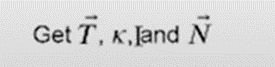

In [49]:
T = v/v_norm
kappa = smp.diff(T,t).norm()/v_norm
N = smp.diff(T,t)/smp.diff(T,t).norm()

In [50]:
T

Matrix([
[(-a*exp(2*t)*sin(t) + 2*a*exp(2*t)*cos(t))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)],
[                                  b*cos(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)],
[                                         c/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)]])

In [51]:
kappa

sqrt(c**2*(b**2*sin(t)*cos(t) - (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(8*a*exp(2*t)*sin(t) - 6*a*exp(2*t)*cos(t))/2)**2/(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)**3 + Abs((a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(b**2*sin(t)*cos(t) - (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(8*a*exp(2*t)*sin(t) - 6*a*exp(2*t)*cos(t))/2)/(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)**(3/2) + (4*a*exp(2*t)*sin(t) - 3*a*exp(2*t)*cos(t))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2))**2 + Abs(b*(b**2*sin(t)*cos(t) - (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(8*a*exp(2*t)*sin(t) - 6*a*exp(2*t)*cos(t))/2)*cos(t)/(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)**(3/2) - b*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2))**2)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)

In [52]:
N

Matrix([
[((-4*a*exp(2*t)*sin(t) + 3*a*exp(2*t)*cos(t))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2) + (-a*exp(2*t)*sin(t) + 2*a*exp(2*t)*cos(t))*(b**2*sin(t)*cos(t) - (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(8*a*exp(2*t)*sin(t) - 6*a*exp(2*t)*cos(t))/2)/(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)**(3/2))/sqrt(c**2*(b**2*sin(t)*cos(t) - (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(8*a*exp(2*t)*sin(t) - 6*a*exp(2*t)*cos(t))/2)**2/(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)**3 + Abs((a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(b**2*sin(t)*cos(t) - (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(8*a*exp(2*t)*sin(t) - 6*a*exp(2*t)*cos(t))/2)/(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2)**(3/2) + (4*a*exp(2*t)*sin(t) - 3*a*exp(2*t)*cos(t))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))**2))**2 + Abs(b*(b**2*sin(t)*cos(t) - (a*exp(2*t)*sin(t) - 2*a*exp(2*t)*cos(t))*(8

In [53]:
can aslo make continuous plots

SyntaxError: invalid syntax (3657023862.py, line 1)

In [54]:
kappa.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

0.000172746446383864

In [55]:
N.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

Matrix([
[-0.0179055123509899],
[ 0.0733148032452481],
[ -0.997148099457929]])

Can also make continuous plots

In [56]:
kappa_num = smp.lambdify([t,a,b,c],kappa)

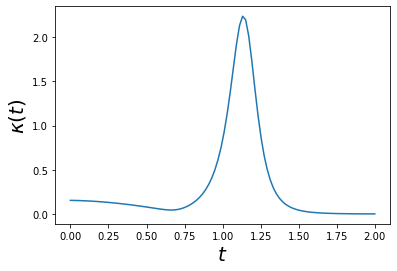

In [57]:
tt = np.linspace(0,2,100)
kk = kappa_num(tt,1,2,3)
plt.plot(tt,kk)
plt.xlabel('$t$',fontsize =20)
plt.ylabel('$\kappa(t)$',fontsize=20)
plt.show()

Partial / Directional Derivatives

In [58]:
x,y,z = smp.symbols('x y z')

Basics

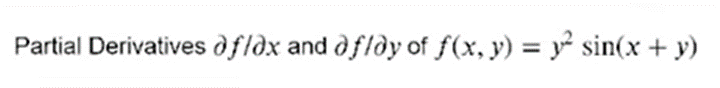

In [59]:
f = y**2*smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [60]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

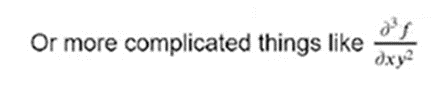

In [61]:
smp.diff(f,x,y,y)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

In [62]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

# The Chain Rule

In [63]:
t = smp.symbols('t')
x, y, z, w, v = smp.symbols('x, y, z w v', cls =smp.Function)

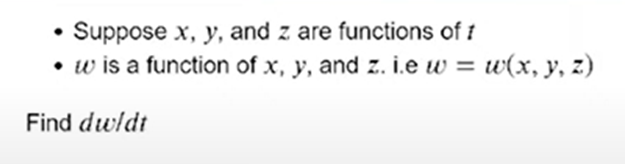

In [64]:
x = x (t)
y = y (t)
z = z (t)
w = w(x,y,z)

Can keep things in a more functional form:

In [65]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Can keep thigs in a more functional form:

Or Put in specific function

In [66]:
w1 = x**2 + smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x,smp.sin(t)),(y,smp.cos(t)),(z,t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

# Gradients

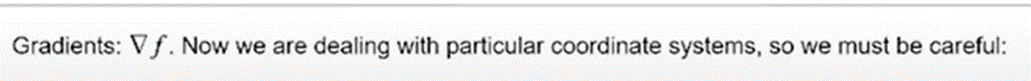

In [67]:
C = CoordSys3D('')

In [68]:
f = C.x*smp.sin(C.y)
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [69]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [70]:
gradient(f).to_matrix(C).subs([(C.y,1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

# Directional Derivatives

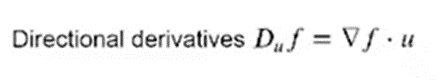

In [71]:
u = 4*C.i - 3*C.j +2*C.k
#Make into unit vector
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [72]:
gradient (f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

# Extreme Values and Saddle Points

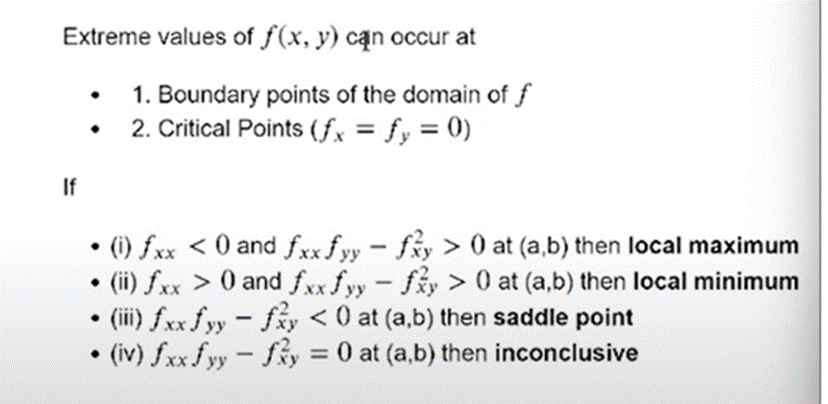

In [73]:
x,y = smp.symbols('x y',real=True)
f = x**3 + 3*x*y + y*3
f

x**3 + 3*x*y + 3*y

In [74]:
smp.solve ([smp.diff(f,x),smp.diff(f,y)])

[{x: -1, y: -1}]

In [75]:
fxx = smp.diff(f,x,x)
fyy = smp.diff(f,y,y)
fxy = smp.diff(f,x,y)

Testing the first point